In [113]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [114]:
#Define df as our Dataset and set date as our index for the Dataset
df = pd.read_csv("data_clean_with_dummies.csv")
df = df.set_index('date')

#Define X and y, with X holding the Features and y the correspoding Count of pedestrians
#Features with PCA k=0.999 (PC1 - PC48)
X = df[df.columns[55:103]]

# The targetvariable we try to predict is the pedestrian count
y = df["pedestrians count"]

In [115]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets as numpy arryas (for our Neural Network)
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)


from sklearn.preprocessing import StandardScaler

# Scale the inputs to standardize the values of the Features
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)


In [116]:
#Import Keras and layers to create a Neural Network with multiple layers
from tensorflow import keras
from tensorflow.keras import layers

In [117]:
#Define Neural Network model

#Create a Keras Sequential class to hold the different layers of our Neural Network
model = keras.Sequential()

model.add(keras.Input(shape=X.shape[1])) #Add a Input layer and define the Input shape of it (which is the column lenght of the feature Dataset X)
model.add(layers.Dense(500, activation="relu")) #Add a Hidden layer with 500 Neurones with Dense. Dense takes the output from our Input layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(250, activation="relu")) #Add a second Hidden layer with 250 Neurones with Dense. Dense takes the output from our first hidden layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(100, activation="relu")) #Add a third Hidden layer with 100 Neurones with Dense. 
model.add(layers.Dense(50, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(1, activation="relu")) # Add a output layer with 1 Neuron because we only have one output --> predicted pedestrian count

model.summary()#Display a overview of the Model


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 500)               24500     
                                                                 
 dense_32 (Dense)            (None, 250)               125250    
                                                                 
 dense_33 (Dense)            (None, 100)               25100     
                                                                 
 dense_34 (Dense)            (None, 50)                5050      
                                                                 
 dense_35 (Dense)            (None, 1)                 51        
                                                                 
Total params: 179,951
Trainable params: 179,951
Non-trainable params: 0
_________________________________________________________________


In [132]:
#Specify the training configuration for the Neural Network
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Optimizer that minimizes our loss function (f.e SGD or Adam) with a learning rate of 0.001
    loss=keras.losses.mae,  # Loss function to minimize --> Mean absolute error 
    metrics=["mae"], # List of metrics to monitor
)


history = model.fit(
    Xtrain, # Fit the model on the train data 
    ytrain, #Fit the model on the train data 
    batch_size=64,
    epochs=250,
    #callbacks = tf.keras.callbacks.EarlyStopping(monitor='metrics', patience=3), #Stop training when training is no longer improving Mean absolute error and the accuracy within 3 epochs (metrics)
    validation_split=0.2, #Reserve 20% of the training data for validation at the end of each epoch 
)

Epoch 1/250


2022-11-22 22:47:51.962618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


135/135 [==============================] - ETA: 0s - loss: 132.0316 - mae: 132.0316

2022-11-22 22:47:53.568794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


135/135 [==============================] - 2s 11ms/step - loss: 132.0316 - mae: 132.0316 - val_loss: 408.2747 - val_mae: 408.2747
Epoch 2/250
135/135 [==============================] - 1s 8ms/step - loss: 114.4968 - mae: 114.4968 - val_loss: 404.4565 - val_mae: 404.4565
Epoch 3/250
135/135 [==============================] - 1s 8ms/step - loss: 110.5514 - mae: 110.5514 - val_loss: 405.0875 - val_mae: 405.0875
Epoch 4/250
135/135 [==============================] - 1s 9ms/step - loss: 109.9281 - mae: 109.9281 - val_loss: 409.7250 - val_mae: 409.7250
Epoch 5/250
135/135 [==============================] - 1s 8ms/step - loss: 108.4530 - mae: 108.4530 - val_loss: 404.6432 - val_mae: 404.6432
Epoch 6/250
135/135 [==============================] - 1s 8ms/step - loss: 106.7450 - mae: 106.7450 - val_loss: 407.9118 - val_mae: 407.9118
Epoch 7/250
135/135 [==============================] - 1s 8ms/step - loss: 104.2192 - mae: 104.2192 - val_loss: 403.8859 - val_mae: 403.8859
Epoch 8/250
135/135 [===

In [134]:
from sklearn.metrics import r2_score
#import tensorflow_addons as tfa


pred_train = model.predict(Xtrain)
ypred = model.predict(Xtest)
print(f"R score is : {r2_score(ytest, ypred)}")

# mae = tf.keras.losses.MeanAbsoluteError()
# mae(ytest, ypred).numpy()
# print(f"MAE is : {tf.keras.losses.MeanAbsoluteError(ytest, ypred).numpy()}"

144/144 [==============================] - 0s 2ms/step
R score is : 0.9383278415364245


In [135]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(Xtest, ytest, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions")
pred_test = model.predict(Xtest)
print("predictions shape:", pred_test.shape)

Evaluate on test data
36/36 [==============================] - 0s 8ms/step - loss: 350.3139 - mae: 350.3139
test loss, test acc: [350.3138732910156, 350.3138732910156]
Generate predictions
144/144 [==============================] - 0s 3ms/step
predictions shape: (4608, 1)


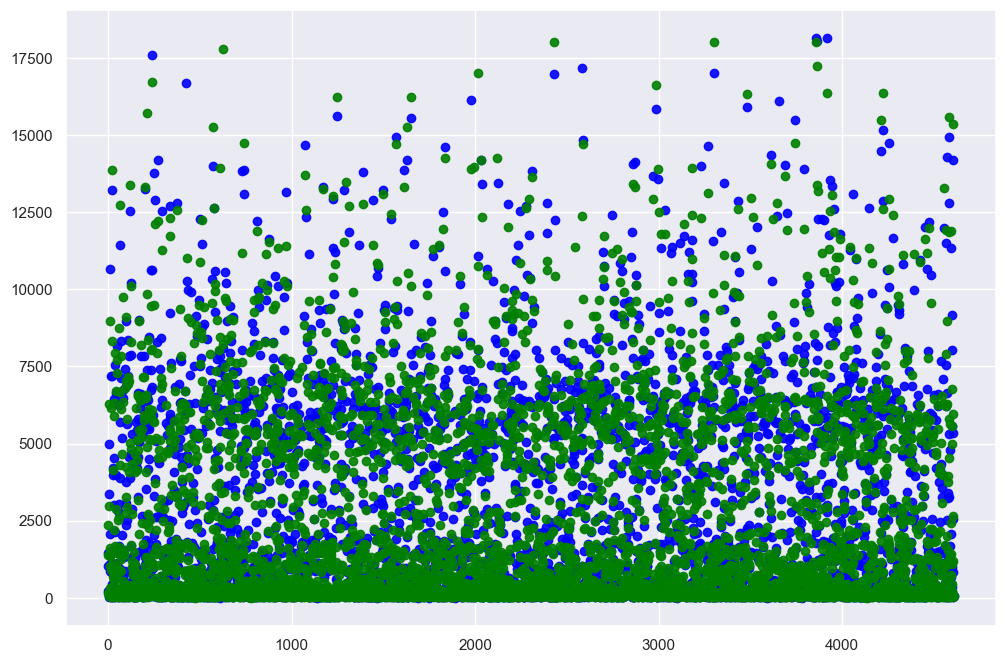

In [136]:
#Visualize the results predictions vs actual values
#Create a sequenze from 0 to the row lenght of the test data in order to plot
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

fig, ax = plt.subplots(figsize=(12, 8))

# ypred = pd.Series(ypred) 

plt.scatter(xs, ytest, color ='blue', alpha=0.9)

plt.scatter(xs, ypred, color ='green', alpha=0.9)

plt.show()

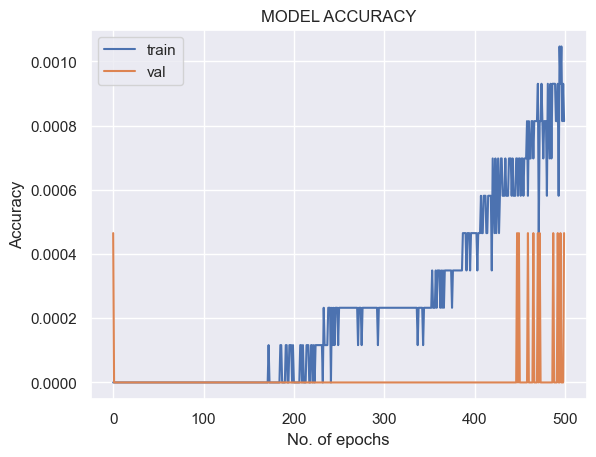

In [122]:
#from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()